Here's a tweet I saw last week:

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Durand–Kerner method: surprisingly simple way of computing all the roots of a polynomial. <a href="https://t.co/Ikv22o5jDO">https://t.co/Ikv22o5jDO</a> <a href="https://t.co/BAoI0ayfwi">pic.twitter.com/BAoI0ayfwi</a></p>&mdash; Gabriel Peyré (@gabrielpeyre) <a href="https://twitter.com/gabrielpeyre/status/923832635193024512?ref_src=twsrc%5Etfw">October 27, 2017</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

This looks interesting: a method for finding roots in the complex plane. Let's see if we can implement it in Python.

[Wikipedia](https://en.wikipedia.org/wiki/Durand–Kerner_method) has a nice post on the topic. It gives the following example polynomial:

$$
x^3 − 3x^2 + 3 x − 5
$$

Let's plot its values in the complex plane:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(z):
    """Sample function for root finding."""
    return z**3 - 3*z**2 + 3*z - 5

In [3]:
import domain_coloring as dc

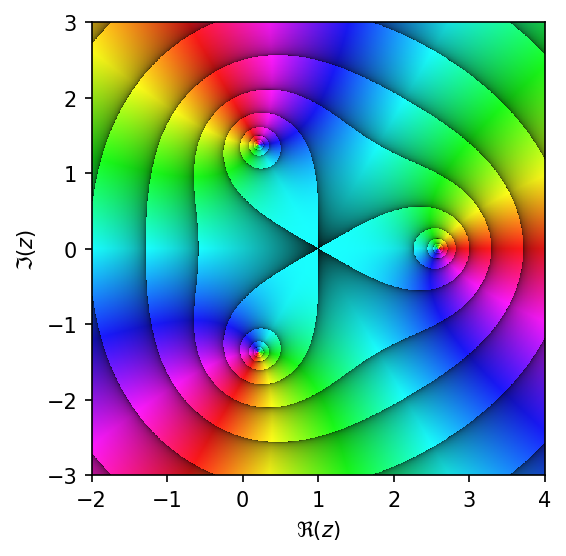

In [4]:
fig, ax = plt.subplots(dpi=150)
dc.plot_domain(dc.modulus_domaincol, f, re=[-2, 4], im=[-3, 3], daxis=True)

As one can see above, there are three roots. Let's try to apply the Durand-Kerner scheme described on Wikipedia. Basically, at each step we move a little from the previous estimate. If this sort of equation looks familiar to you, it's because it is Newton's root finding method for polynoms (where the derivate can be computed exactly)! 

In [5]:
def durand_kerner(p, q, r, func):
    """Performs a step of the Durand-Kerner algorithm for order 3 polynomial."""
    pp = p - func(p) / ((p - q) * (p - r))
    qq = q - func(q) / ((q - p) * (q - r))
    rr = r - func(r) / ((r - p) * (r - q))
    return pp, qq, rr

Let's see if we find the same values than in Wikipedia.

In [6]:
p, q, r = 1 + 0*1j, 0.4 + 0.9j, -0.65 + 0.72j 

vals = [(p, q, r)]  
for _ in range(6):
    p, q, r = durand_kerner(p, q, r, f)
    vals.append((p, q, r))

In [7]:
import pandas as pd

In [8]:
pd.DataFrame(vals, columns=['p', 'q', 'r'])

,p,q,r
0,(1+0j),(0.4+0.9j),(-0.65+0.72j)
1,(1.36077347935+2.02223029216j),(-1.39821332954-0.693566359625j),(3.03743985019-1.32866393253j)
2,(0.98096328372+1.34746269108j),(-0.335251932601-0.644068607728j),(2.35428864888-0.703394083357j)
3,(0.317180549257+0.93649454852j),(0.490015720787-0.966141079031j),(2.19280372996+0.0296465305112j)
4,(0.209015638973+1.57274201477j),(0.0412060386627-1.52751920976j),(2.74977832236-0.0452228050019j)
5,(0.21297050701+1.39482747314j),(0.184678465837-1.38456538218j),(2.60235102715-0.0102620909563j)
6,(0.206530751938+1.37487874277j),(0.206001073361-1.37465292077j),(2.5874681747-0.000225822000015j)


Indeed, these are the values Wikipedia shows.

Let's plot how the roots evolve as a function of iteration step.

In [9]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

p, q, r = 1 + 0*1j, 0.4 + 0.9j, -0.65 + 0.72j 
iteration = 0
duration = 2

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
def make_frame(t):
    ax.clear()
    dc.plot_domain(dc.modulus_domaincol, f, re=[-2, 4], im=[-3, 3], daxis=True, ax=ax)
    global p, q, r, iteration
    ax.plot(np.c_[[np.real(z) for z in (p, q, r)]],
            np.c_[[np.imag(z) for z in (p, q, r)]], 'ok')
    ax.set_title("iteration {}".format(iteration))
    p, q, r = durand_kerner(p, q, r, f)
    iteration += 1
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
plt.close(fig)
animation.ipython_display(fps=4, loop=True, autoplay=True)

 89%|████████▉ | 8/9 [00:05<00:00,  1.29it/s]


Can we also plot the trajectory of the iterated values themselves?

In [10]:
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

p, q, r = 1 + 0*1j, 0.4 + 0.9j, -0.65 + 0.72j 
vals = [(p, q, r)]  
    
iteration = 0
duration = 2

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
def make_frame(t):
    ax.clear()
    dc.plot_domain(dc.modulus_domaincol, f, re=[-2, 4], im=[-3, 3], daxis=True, ax=ax)
    global p, q, r, iteration, vals
    ax.plot(np.c_[[np.real(z) for z in (p, q, r)]],
            np.c_[[np.imag(z) for z in (p, q, r)]], 'ok')
    for ind in range(3):
        ax.plot(np.c_[[np.real(z[ind]) for z in vals]],
                np.c_[[np.imag(z[ind]) for z in vals]], '-r')
    ax.set_title("iteration {}".format(iteration))
    p, q, r = durand_kerner(p, q, r, f)
    vals.append((p, q, r))
    iteration += 1
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
plt.close(fig)
animation.ipython_display(fps=5, loop=True, autoplay=True)

 91%|█████████ | 10/11 [00:06<00:00,  1.33it/s]


Not very spectacular, but it works. An interesting point in the above animation is that it highlights the fact that the roots are really following the gradient of the function, as shown by the trajectory that is perpendicular to the level-surfaces.

*This post was entirely written using the IPython notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20171110_DurandKerner.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20171110_DurandKerner.ipynb).*